In [318]:
from oracles import QuadraticOracle
import numpy as np
from plot_trajectory_2d import plot_levels, plot_trajectory
from optimization import newton, gradient_descent
import oracles
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy

import plotly.express as px

from sklearn.datasets import load_svmlight_file

import plotly
from IPython.display import display, HTML

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

%reload_ext autoreload
%autoreload 2

# GD

## Quadratic

In [230]:
n_q = 100
k_q = 10
diagonal_q = np.concatenate((np.array([1]), np.random.randint(low=1, high=k_q+1, size=n_q-2), np.array([k_q]))) / k_q
A_q = np.diag(diagonal_q)
b_q = np.random.randn(n_q)
x_0_q = np.zeros_like(b_q)
f_min_q = -1 / 2 * b_q @ np.linalg.inv(A_q) @ b_q

In [231]:
f_min_q

-130.47291428022953

In [232]:
print(np.max(np.linalg.eigvals(A_q)) / np.min(np.linalg.eigvals(A_q)))

10.0


In [233]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)
is_pos_def(A_q)

True

In [234]:
oracle_quad = oracles.QuadraticOracle(A_q, b_q)

### Wolf

In [235]:
c2_grad_quad = [0.95, 0.9, 0.4, 0.1, 0.05, 0.001, ]

In [236]:
wolf_grad_func = {i: [] for i in c2_grad_quad}
wolf_grad_iter = {i: 0 for i in c2_grad_quad}
for c_i in c2_grad_quad:
    x_q_grad_W, mes_q_grad_W, hist_q_grad_W = gradient_descent(oracle_quad, x_0_q, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Wolfe', 'c2': c_i})
    wolf_grad_func[c_i] = np.log10((np.abs(np.array(hist_q_grad_W['func']) - f_min_q)) / np.abs(f_min_q))
    wolf_grad_iter[c_i] = len(hist_q_grad_W['func'])

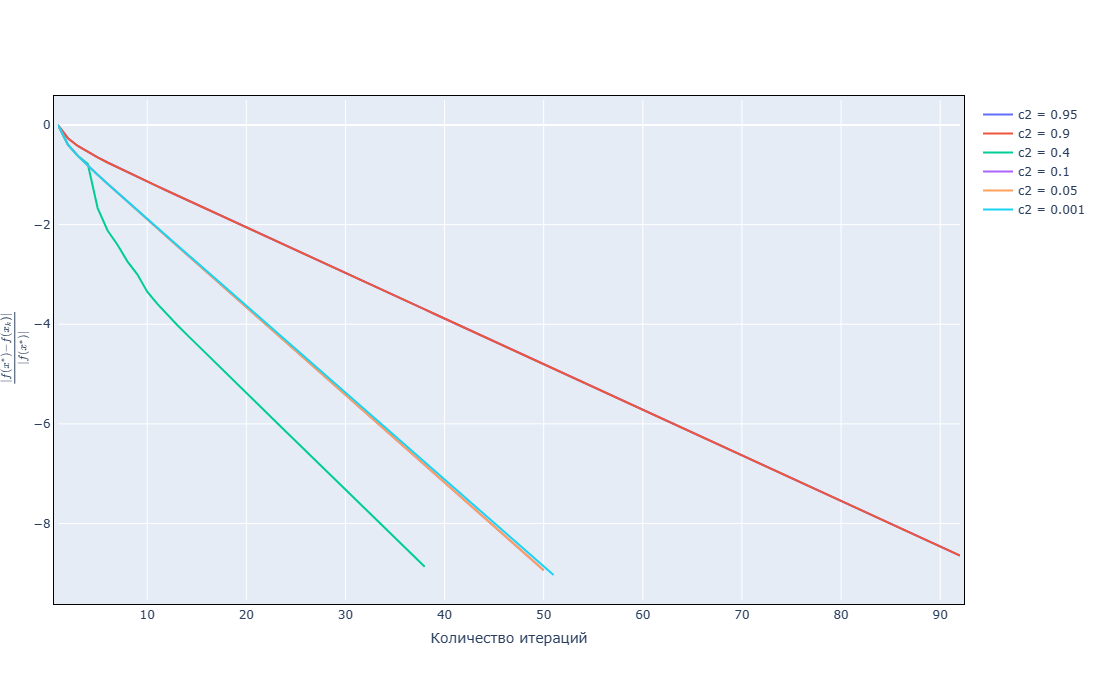

In [327]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|f(x^*) - f(x_k)|}{|f(x^*)|}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c2 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c2_grad_quad:
    x = np.arange(1, wolf_grad_iter[c_i]+1)
    y = wolf_grad_func[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Armijo

In [239]:
c1_grad_quad = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 9e-1]

In [240]:
ar_grad_func = {i: [] for i in c1_grad_quad}
ar_grad_iter = {i: 0 for i in c1_grad_quad}
for c_i in c1_grad_quad:
    x_q_grad_A, mes_q_grad_A, hist_q_grad_A = gradient_descent(oracle_quad, x_0_q, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Armijo', 'c1': c_i})
    ar_grad_func[c_i] = np.log10((np.abs(np.array(hist_q_grad_A['func']) - f_min_q)) / np.abs(f_min_q))
    ar_grad_iter[c_i] = len(hist_q_grad_A['func'])

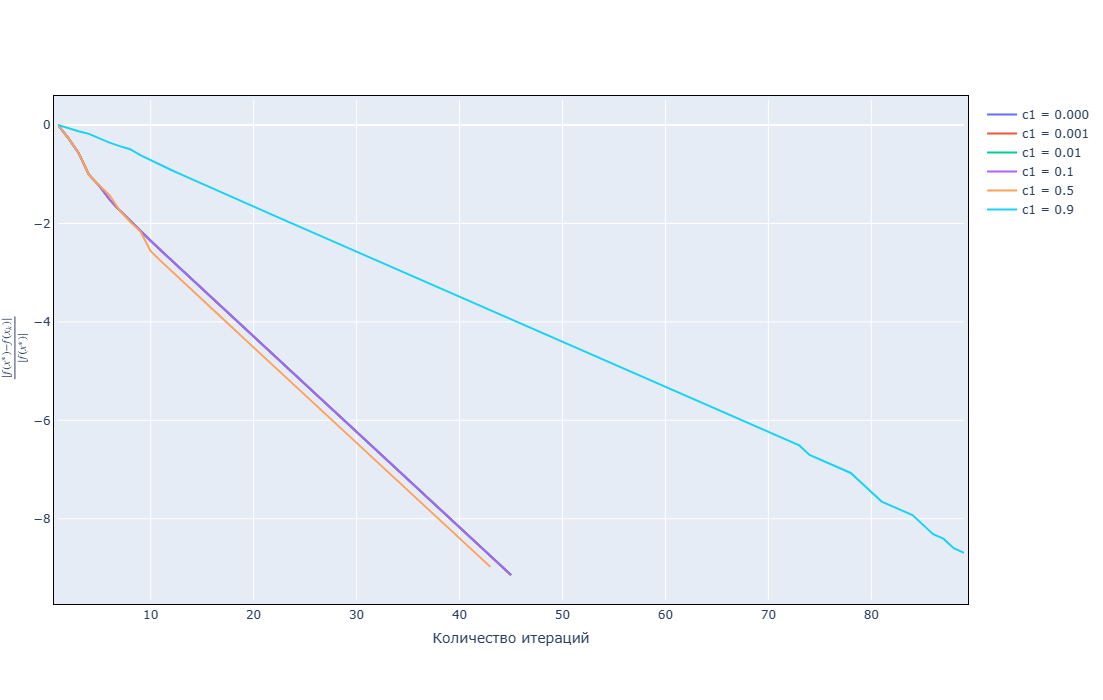

In [329]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|f(x^*) - f(x_k)|}{|f(x^*)|}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c1 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c1_grad_quad:
    x = np.arange(1, ar_grad_iter[c_i]+1)
    y = ar_grad_func[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Constant

In [242]:
c_grad_quad = [2, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]

In [243]:
c_grad_func = {i: [] for i in c_grad_quad}
c_grad_iter = {i: 0 for i in c_grad_quad}
for c_i in c_grad_quad:
    x_q_grad_C, mes_q_grad_C, hist_q_grad_C = gradient_descent(oracle_quad, x_0_q, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Constant', 'c': c_i})
    c_grad_func[c_i] = np.log10((np.abs(np.array(hist_q_grad_C['func']) - f_min_q)) / np.abs(f_min_q))
    c_grad_iter[c_i] = len(hist_q_grad_C['func'])

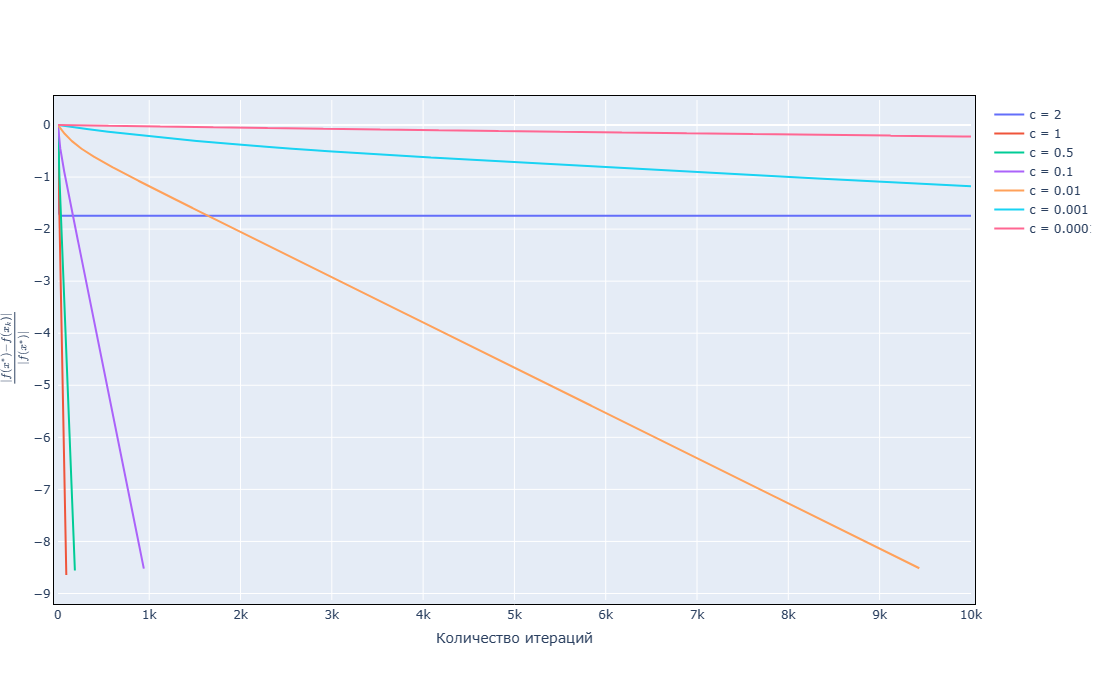

In [330]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|f(x^*) - f(x_k)|}{|f(x^*)|}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c_grad_quad:
    x = np.arange(1, c_grad_iter[c_i]+1)
    y = c_grad_func[c_i]
    add_line(fig, x, y, c_i)
fig.show()

## LogReg

In [285]:
n_l = 2000
m_l = 500
A_l = np.random.randn(n_l, m_l) * 1000
b_l = np.random.choice(np.array([-1, 1]), size=n_l)
x_0_l = np.zeros(m_l)
lambda_l = 1 / n_l

In [286]:
oracle_lreg = oracles.create_log_reg_oracle(A_l, b_l, lambda_l)

### Wolf

In [287]:
c2_grad_reg = [0.99, 0.9, 0.4, 0.1, 0.05, 0.001]

In [288]:
wolf_grad_func_reg = {i: [] for i in c2_grad_reg}
wolf_grad_iter_reg = {i: 0 for i in c2_grad_reg}
for c_i in c2_grad_reg:
    x_l_grad_W, mes_l_grad_W, hist_l_grad_W = gradient_descent(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Wolfe', 'c2': c_i})
    wolf_grad_func_reg[c_i] = np.log10(np.array(hist_l_grad_W['grad'])**2 / hist_l_grad_W['grad'][0]**2)
    wolf_grad_iter_reg[c_i] = len(hist_l_grad_W['func'])

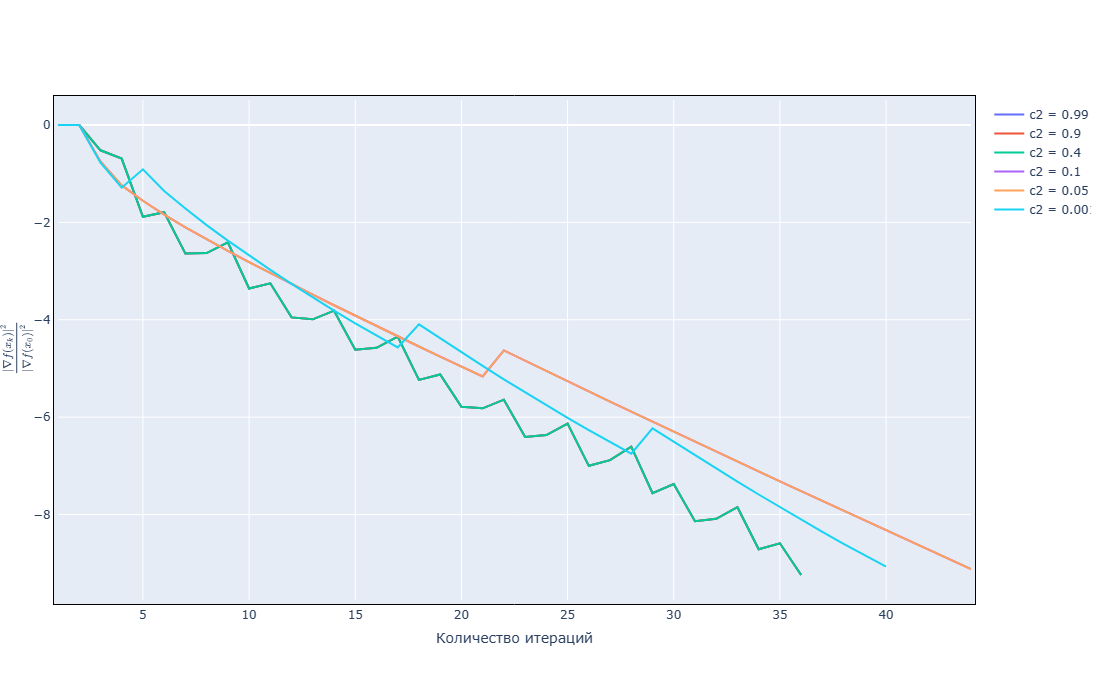

In [333]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c2 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c2_grad_reg:
    x = np.arange(1, wolf_grad_iter_reg[c_i]+1)
    y = wolf_grad_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Armijo

In [290]:
c1_grad_reg = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 9e-1]

In [291]:
ar_grad_func_reg = {i: [] for i in c1_grad_reg}
ar_grad_iter_reg = {i: 0 for i in c1_grad_reg}
for c_i in c1_grad_reg:
    x_l_grad_A, mes_l_grad_A, hist_l_grad_A = gradient_descent(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Armijo', 'c1': c_i})
    ar_grad_func_reg[c_i] = np.log10(np.array(hist_l_grad_A['grad'])**2 / hist_l_grad_A['grad'][0]**2)
    ar_grad_iter_reg[c_i] = len(hist_l_grad_A['func'])

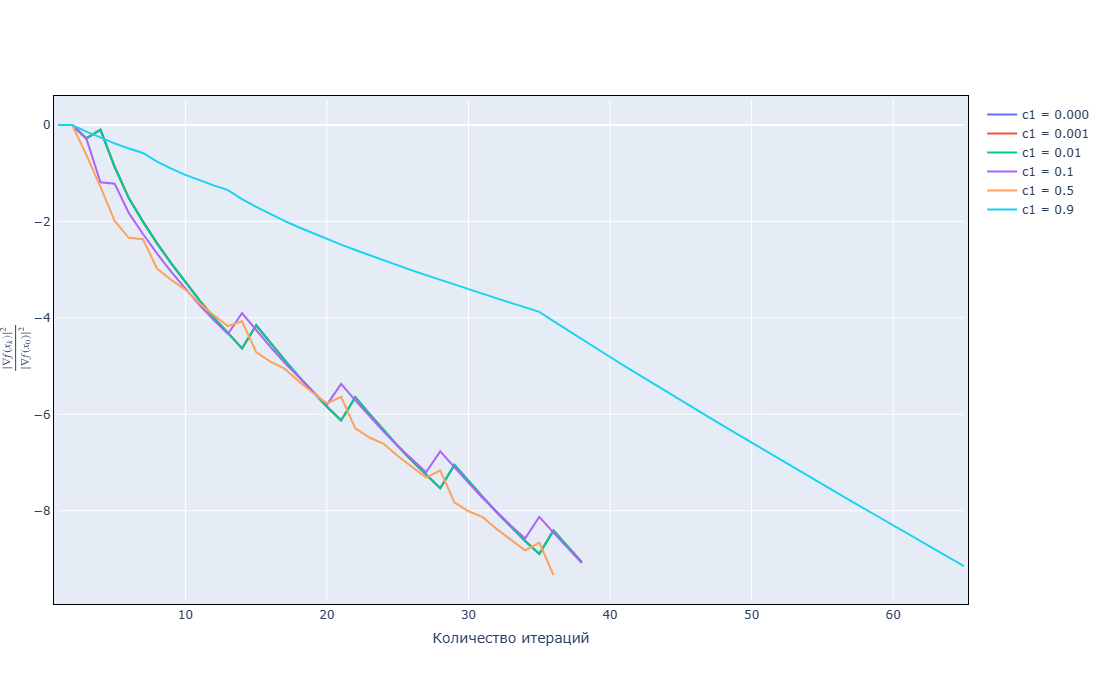

In [334]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c1 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c1_grad_reg:
    x = np.arange(1, ar_grad_iter_reg[c_i]+1)
    y = ar_grad_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Constant

In [381]:
c_grad_reg = [10 ** -6, 2 * 10 ** -6, 3* 10 ** -6]

In [382]:
c_grad_func_reg = {i: [] for i in c_grad_reg}
c_grad_iter_reg = {i: 0 for i in c_grad_reg}
for c_i in c_grad_reg:
    x_l_grad_C, mes_l_grad_C, hist_l_grad_C = gradient_descent(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Constant', 'c': c_i})
    c_grad_func_reg[c_i] = np.log10(np.array(hist_l_grad_C['grad'])**2 / hist_l_grad_C['grad'][0]**2)
    c_grad_iter_reg[c_i] = len(hist_l_grad_C['func'])

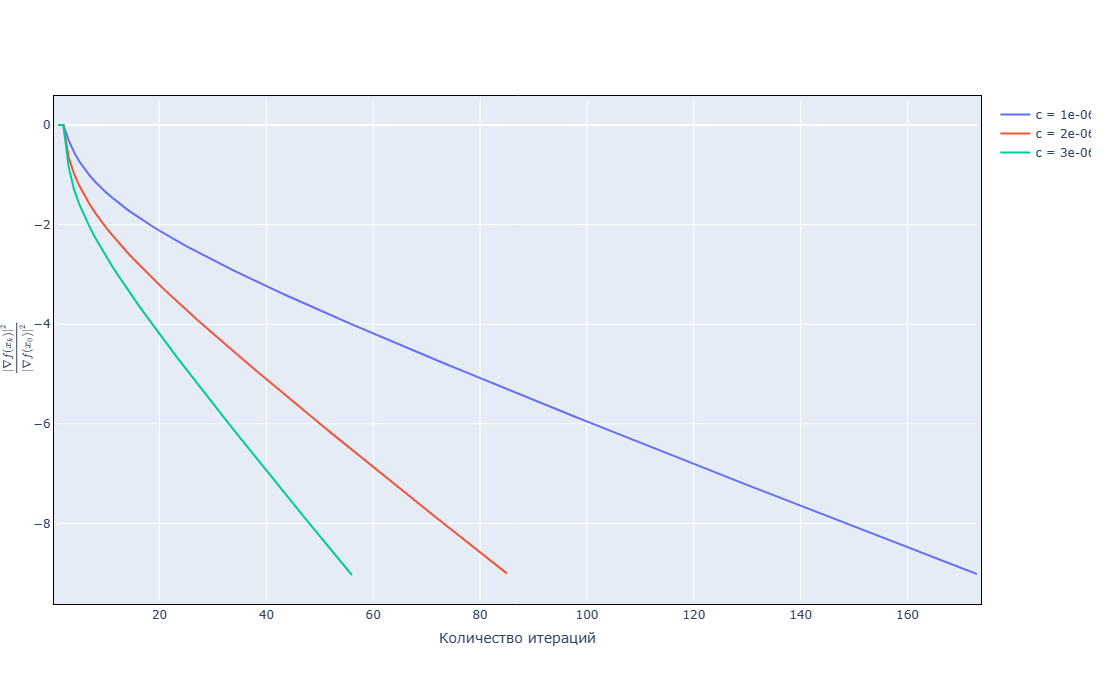

In [384]:
layout = go.Layout(
    autosize=False,
    width=800,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c_grad_reg:
    x = np.arange(1, c_grad_iter_reg[c_i]+1)
    y = c_grad_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()

# Newton & LogReg

## Wolf

In [296]:
c2_new_reg = [0.99, 0.9, 0.4, 0.1, 0.05, 0.001]

In [297]:
wolf_new_func_reg = {i: [] for i in c2_new_reg}
wolf_new_iter_reg = {i: 0 for i in c2_new_reg}
for c_i in c2_new_reg:
    x_l_new_W, mes_l_new_W, hist_l_new_W = newton(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Wolfe', 'c2': c_i})
    wolf_new_func_reg[c_i] = np.log10(np.array(hist_l_new_W['grad'])**2 / hist_l_new_W['grad'][0]**2)
    wolf_new_iter_reg[c_i] = len(hist_l_new_W['func'])

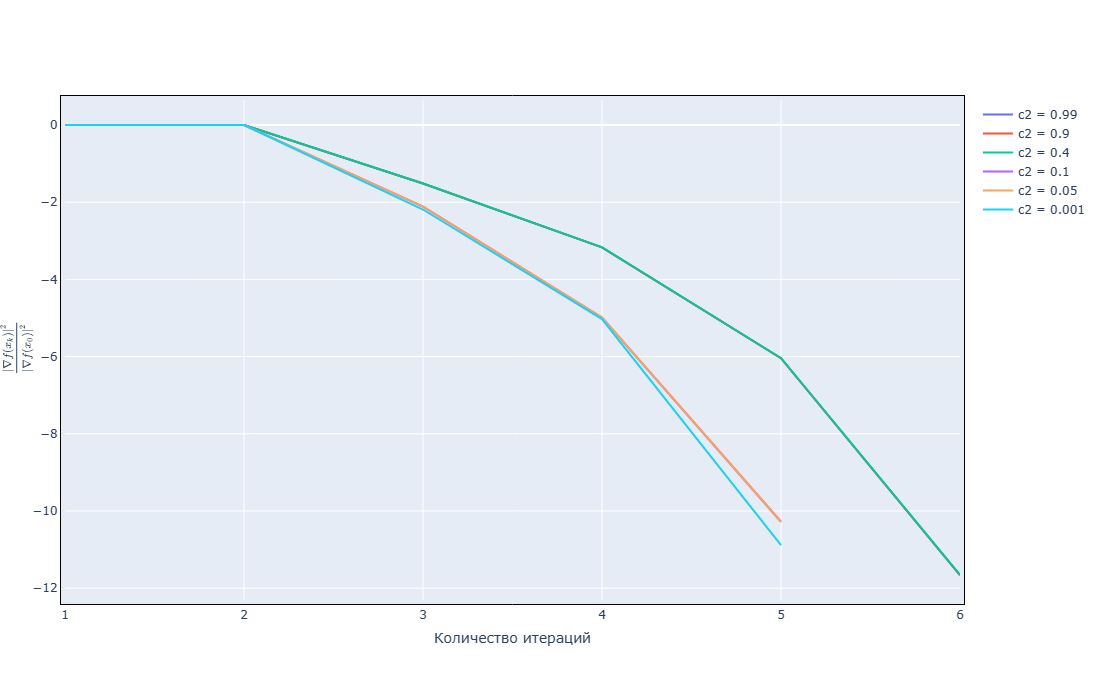

In [366]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c2 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c2_new_reg:
    x = np.arange(1, wolf_new_iter_reg[c_i]+1)
    y = wolf_new_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Armijo

In [340]:
c1_new_reg = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1]

In [341]:
ar_new_func_reg = {i: [] for i in c1_new_reg}
ar_new_iter_reg = {i: 0 for i in c1_new_reg}
for c_i in c1_new_reg:
    x_l_new_A, mes_l_new_A, hist_l_new_A = newton(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Armijo', 'c1': c_i})
    ar_new_func_reg[c_i] = np.log10(np.array(hist_l_new_A['grad'])**2 / hist_l_new_A['grad'][0]**2)
    ar_new_iter_reg[c_i] = len(hist_l_new_A['func'])

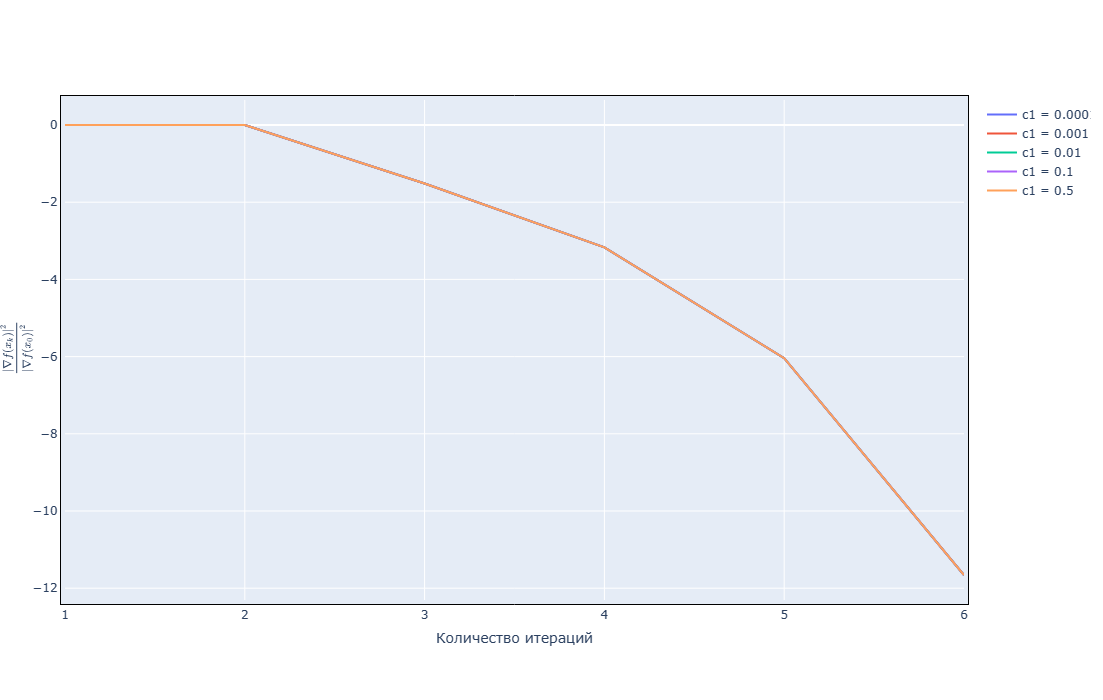

In [342]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c1 = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c1_new_reg:
    x = np.arange(1, ar_new_iter_reg[c_i]+1)
    y = ar_new_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()

### Constant

In [367]:
c_new_reg = [1, 0.5, 0.1, 0.01, 0.001, 0.0001]

In [370]:
c_new_func_reg = {i: [] for i in c_new_reg}
c_new_iter_reg = {i: 0 for i in c_new_reg}
for c_i in c_new_reg:
    x_l_new_C, mes_l_new_C, hist_l_new_C = newton(oracle_lreg, x_0_l, trace=True, tolerance=1e-9,
                                                               line_search_options={'method': 'Constant', 'c': c_i})
    c_new_func_reg[c_i] = np.log10(np.array(hist_l_new_C['grad'])**2 / hist_l_new_C['grad'][0]**2)
    c_new_iter_reg[c_i] = len(hist_l_new_C['grad'])

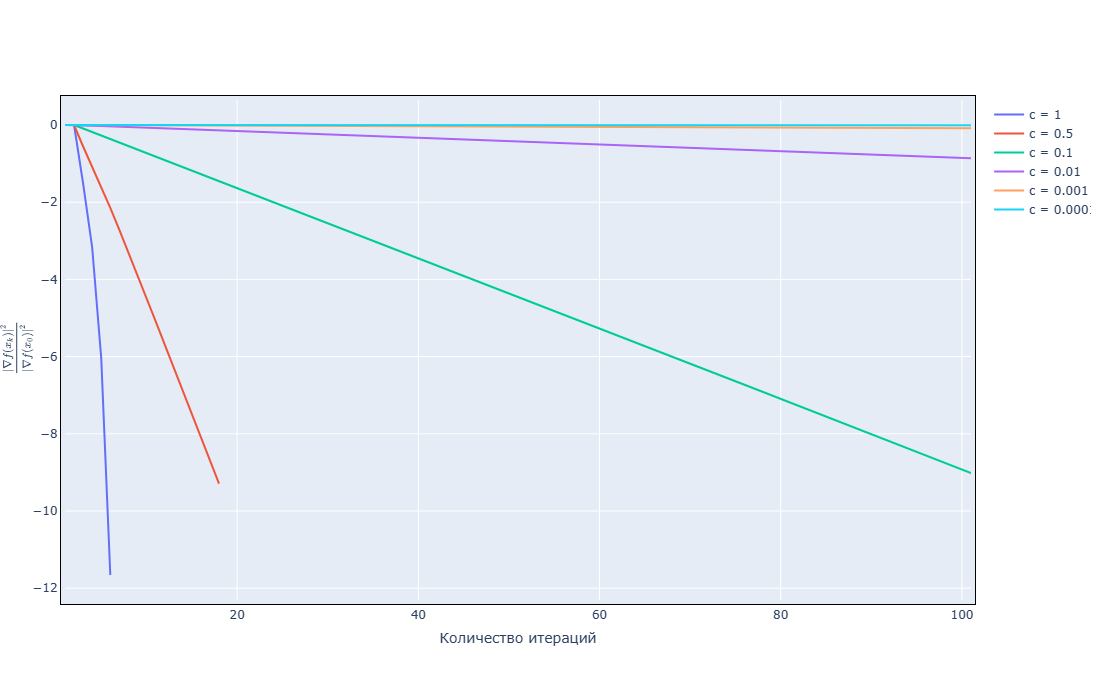

In [371]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    # title = "",
    xaxis_title="Количество итераций",
    yaxis_title=r"$\frac{|\nabla f(x_k)|^2}{|\nabla f(x_0)|^2}$"
)

fig = go.Figure(layout=layout)
def add_line(fig, x, y, ci):
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name='c = '+str(ci),
                            # line_color=color,
                            showlegend=True))
for c_i in c_new_reg:
    x = np.arange(1, c_new_iter_reg[c_i]+1)
    y = c_new_func_reg[c_i]
    add_line(fig, x, y, c_i)
fig.show()